# Group 10 Final Report - Comparing Serum Cholesterol Levels Between Male and Female
#### Authors: Waris Bhatia, Lucy Liu, Yolanda Wu, Caroline Zhang

In [55]:
library(tidyverse)
library(infer)
library(repr)
library(broom)

## Introduction

Cholesterol level is a fundamental health measurement that positively correlates with cardiovascular risks. What affects the cholesterol level? Despite the fact that males and females have shared exposure towards common risk factors, such as poor diet, obesity, and lack of exercise, gender is commonly observed to be an essential variable in heart disease diagnosis. Hence, identifying gender-specific patterns in the cholesterol level is highly insightful and may increase specificity and accuracy when conducting relevant medical analysis. Ultimately, **this project aims to evaluate whether serum cholesterol level is a potential gender-related risk determinant** by exploring the difference between the average of the cholesterol levels of male and female patients. **In other words, is the mean cholesterol level different for different genders?** To answer this, we hypothesize that female patients have a higher mean cholesterol than male patients. This has been shown in *A Statistical Study of Serum Cholesterol Level by Gender and Race* (Tharu et al., 2017) where female patients are observed to likely have higher serum cholesterol levels. From our preliminary analysis, we also found that females tend to have higher cholesterol levels than male patients. In *Hormones, Genetic Factors, and Gender Differences in Cardiovascular Disease (2002)*, Rossouw highlights the necessity of discussing gender differences in determination of the cardiovascular disease diagnosis. Moreover, *Gender Differences in Cardiovascular Disease* (Gao et al., 2019) frames the premise of this project. 

To address this research question, we will examine **The Heart Disease Data Set**, from the UC Irvine Learning Repository, which is a collection of databases and domain theories that are used for the empirical analysis of machine learning algorithms, and is considered as highly reliable. The dataset contains a total of 303 observations and 14 attributes. Specifically, we will use `sex` as the categorical variable to categorize the data into male and female participants (1 = male, 0 = female) and treat `serum cholesterol level (mg/dl)` as the response variable. 

## Methods and Results

### Data Exploration

First, let's read the dataset into R and have a glimpse at it.

In [56]:
# Download the dataset from the website
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
download.file(url, destfile='heart_data.csv')

# Read the dataset
heart <- read_csv('heart_data.csv')

# Rename the column names
colnames(heart) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

head(heart)

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


Our dataset looks almost tidy. We only need to: 
- convert the `ca` and `thal` columns into integers
- convert the categorical variables (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, `num`) from numeric to character

In [57]:
heart <- heart %>% 
    mutate_at(c("ca", "thal"), as.numeric) %>%
    mutate_at(c(2, 3, 6, 7, 9, 11:14), as.character)

head(heart)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3


Based on our research goal, only two variables are needed in our analysis: `chol` (serum cholesterol in mg/dl) and `sex` (1 = male, 0 = female). Let's select these two columns. There are no missing values (indicated by a "?" elsewhere) in these variables of interest. Hence, we are now ready to plot the data.

In [58]:
chol_sex <- heart %>%
    select(sex, chol)
           
head(chol_sex)

sex,chol
<chr>,<dbl>
1,286
1,229
1,250
0,204
1,236
0,268


Using a histogram to plot sample distributions for a clear visualization and selecting appropriate parameters:

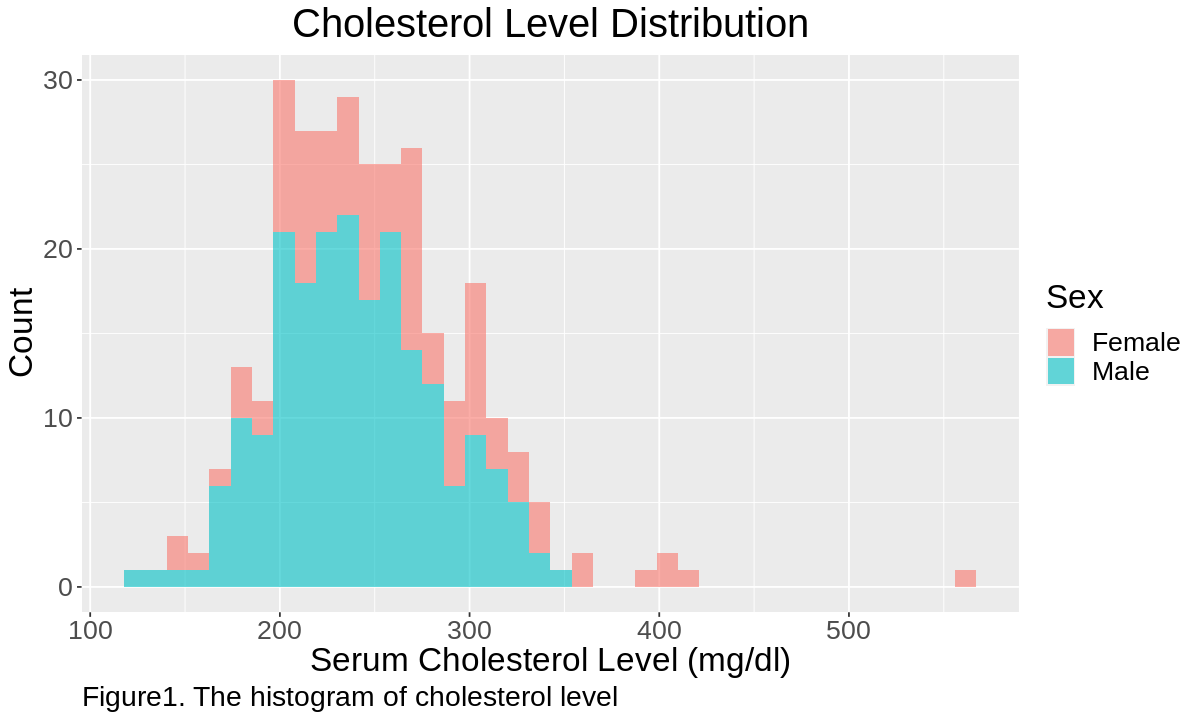

In [59]:
# set the plot size
options(repr.plot.width = 10, repr.plot.height = 6)

# create the histogram
chol_hist <- chol_sex %>%
    ggplot(aes(x = chol, fill = sex)) +
    geom_histogram(bins=40, alpha = 0.6) +
    labs(x = "Serum Cholesterol Level (mg/dl)", 
         y = "Count", 
         fill = "Sex", 
         title = "Cholesterol Level Distribution", 
         caption = "Figure1. The histogram of cholesterol level") +
    theme(text = element_text(size = 20), 
          plot.caption = element_text(size = 17, hjust = 0), 
          plot.title = element_text(hjust = 0.5)) +
    scale_fill_discrete(labels = c("Female", "Male"))

chol_hist

As shown in Figure1, both male and female observations form similar bell-shaped distributions centered around 250 mg/dl. We choose mean and standard deviation as parameters because these parameters are commonly referenced in clinical research. The sample distribution for women has outliers which may cause over-estimates of mean cholesterol levels; however, we are interested in studying the entire population where extreme cases do exist, so we decide to keep the outliers.

Let's take a look at the point estimates for each group.

In [60]:
chol_sex_estimates <- chol_sex %>%
    group_by(sex) %>%
    summarize(mean = mean(chol),
              sd = sd(chol)) %>%
    cbind(sex_label = c("Female", "Male")) %>% 
    relocate(sex_label, .before = sex)
          
chol_sex_estimates

sex_label,sex,mean,sd
<chr>,<chr>,<dbl>,<dbl>
Female,0,261.7526,64.90089
Male,1,239.6341,42.75165


The table above indicates the female sample has a higher mean and standard deviation. Since standard deviation is difficult to plot in the histogram, we will only add means into our plot for comparison:

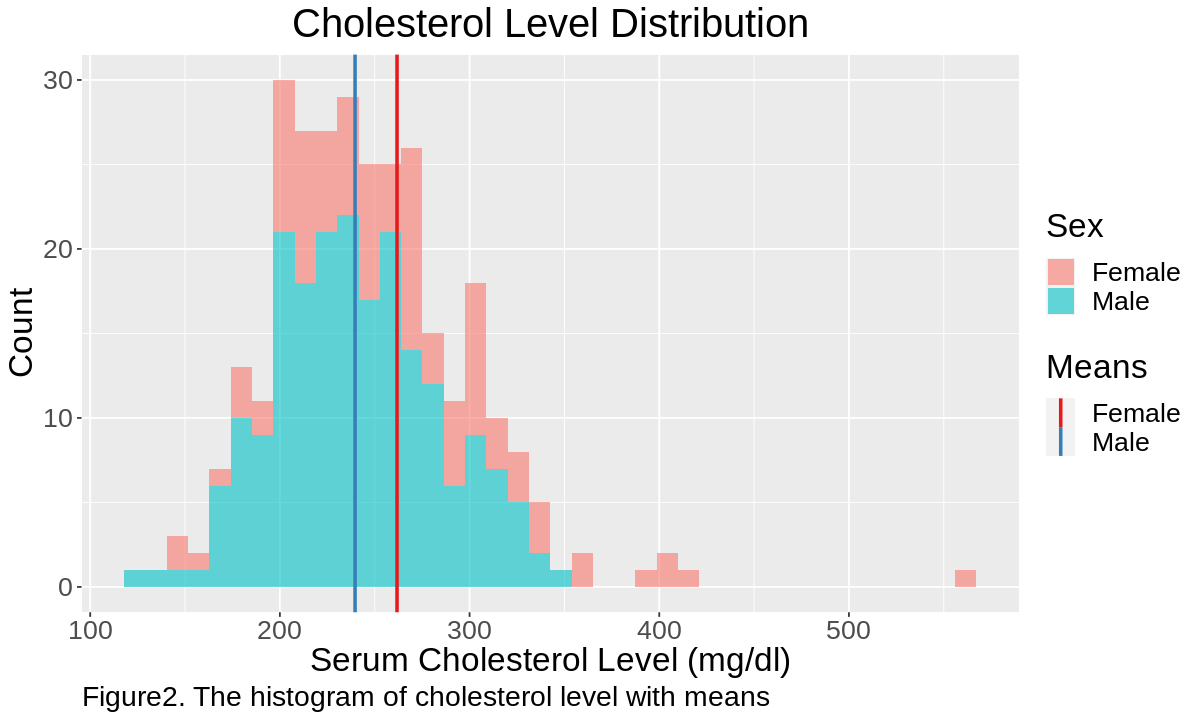

In [61]:
# add mean into chol_hist
chol_hist_mean <- chol_hist + 
    geom_vline(data = chol_sex_estimates, aes(xintercept = mean, color=factor(sex_label)), size = 1) +
    scale_color_brewer(palette="Set1") +
    labs(caption = "Figure2. The histogram of cholesterol level with means", 
         color = "Means", 
         linetype = "Means") 
               
chol_hist_mean

As shown in Figure2, females have a higher mean cholesterol level. Further hypothesis testing is required for statistical significance.

### Hypothesis test for mean
#### Bootstrapping Method

First, we will use the bootstrapping method for hypothesis testing. 

$\mu_1$ is the population mean of women's cholesterol level while $\mu_2$ is the population mean of men's cholesterol level. Since we want to test for women having higher mean cholesterol than men, we will be using a one-sided hypothesis test as we have strong reason to believe women would have a higher mean cholesterol level.

$H0: \mu_1 - \mu_2 = 0$

$H1: \mu_1 - \mu_2 > 0$

We already have a large sample (n= 302) of the population provided through the heart dataset which will be used to bootstrap from.

In [62]:
nrow(chol_sex)

head(chol_sex)

[1] 302

sex,chol
<chr>,<dbl>
1,286
1,229
1,250
0,204
1,236
0,268


In [63]:
# Calculate the observed test statistic
d0 <- chol_sex %>%
      specify(chol ~ sex) %>%
      calculate(stat = "diff in means",
                order = c("0", "1"))
d0

stat
<dbl>
22.11843


In [77]:
# Set seed for reproducible
set.seed(1024)

null_dist <- chol_sex %>%
             specify(chol ~ sex) %>%
             hypothesize(null = "independence") %>%
             generate(reps = 10000, type = "permute") %>%
             calculate(stat = "diff in means",
                order = c("0", "1"))

head(null_dist)

replicate,stat
<int>,<dbl>
1,-9.88126729
2,-1.13336686
3,0.06643198
4,-0.08544129
5,3.75695248
6,-3.12290671


p_value
<dbl>
1e-04


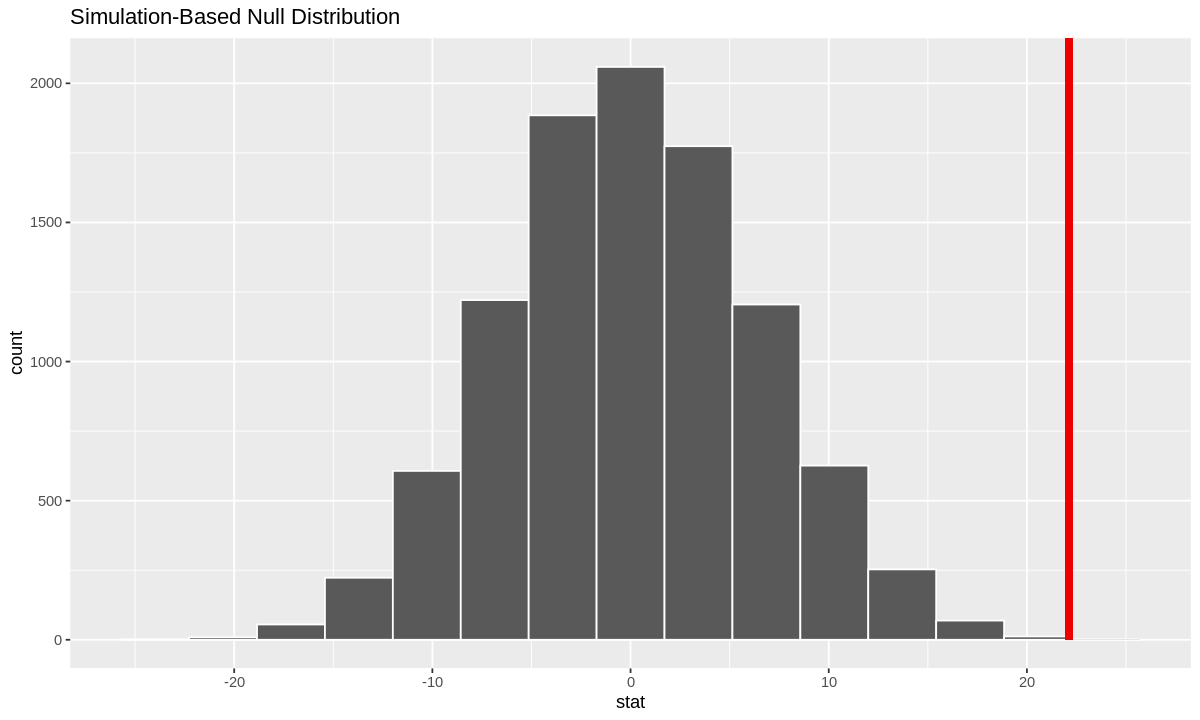

In [72]:
null_dist %>% visualize() + shade_p_value(obs_stat = d0, direction = "right")

pvalue <- null_dist %>%
          get_pvalue(obs_stat = d0, direction = "right")

pvalue

The p-value is smaller than 0.05. Thus, we will reject the null hypothesis with $\alpha = 0.5$ and we conclude that the population mean of women's cholesterol level is significantly larger than men's.

We also use bootstrapping to calculate the confidence interval. 

In [ ]:
boot_dist <- chol_sex %>%
              specify(chol ~ sex) %>%
              generate(reps = 10000, type = "bootstrap") %>%
              calculate(stat = "diff in means",
                order = c("0", "1")) 

ci <- boot_dist %>%
      get_ci

ci

boot_dist %>% visualize() + shade_ci (endpoints = ci)

Since 0 is not captured in this confidence interval, this would match our hypothesis of rejecting the null hypothesis as 0 is not a plausible value of our population parameter at a 95% significance level. We are 95% confident that the true population mean difference will fall between 8.235029 and 36.5919.

#### Asymptotic Method

Next, we will test whether women have a higher mean than men using the asymptotic method. Since two populations are independent, the sample size is sufficiently large, and we don't have access to the population parameters, the two-sample t-test will be appropriate for our approximation of the population mean. This hypothesis testing will be tested on a 5% significance level.

$H_0: \mu_1 - \mu_2 = 0$ 

$H_1: \mu_1 - \mu_2 > 0$

In [ ]:
mean_t_test <-
    tidy(
        t.test(chol ~ sex, data = chol_sex,
               alternative = "greater")
    )

mean_t_test

As we can see from the table above, our sample has test statistic value of 3.057307 with a p-value of 0.001343469 which is smaller then $\alpha = $ 0.05. Therefore, we are going to reject the null hypothesis and we conclude that the population mean of women's cholesterol level is significantly larger than men's. We are also 95% confident that the true population mean difference will fall between 10.13739 and infinity. 

After we used both bootstrapping and asymptotic methods for hypothesis testing of the population mean, we found that the results are pretty similar in that we both rejected the null hypothesis with p-values approaching 0. However, the t-test provides an infinity of our upper confidence level, which is different from the bootstrapping method. Since the purpose of this project is to test whether women have a higher cholesterol level than men, both methods could provide reliable conclusions in rejecting the null hypothesis. 

### Hypothesis test for standard deviation
From Figure1, we can tell that the sample distributions are almost normal, so we can use the F-test to test whether the population standard deviation of women's cholesterol level is significantly larger than men's. $\sigma_1$ is the population standard deviation of women's cholesterol level while $\sigma_2$ is the population standard deviation of men's cholesterol level. And we will investigate: 

$H_0: \sigma_1 = \sigma_2$ 

$H_1: \sigma_1 > \sigma_2$

In [ ]:
var_f_test <- 
    tidy(
    var.test(chol ~ sex, data = chol_sex, 
         alternative = "greater")
        )

var_f_test

As we can see from the table above, our sample has a test statistic value of 2.3046 with a p-value of 3.468934e-07 which is smaller than $\alpha =$ 0.05. Therefore, we are going to reject the null hypothesis and we conclude that the population standard deviation of women's cholesterol levels is significantly larger than men's. 

However, when we do hypothesis testing for standard deviation using the F test, the outliers in women's cholesterol level distribution will affect the result. Thus, using the bootstrapping method for standard deviation is more trustworthy. 

## Discussion

#### Key Findings and Implications

To investigate the difference between average cholesterol levels of male and female, one-tail hypothesis testing using both bootstrapping and asymptotic approaches were adopted, and both methods led to the same conclusion of rejecting the null hypothesis at the 5% significance level. Specifically, hypothesis testing with bootstrapping produced a p-value of 0.0001, whereas the two-sample t-test yielded a p-value of 0.001343469. To restate the hypotheses of our research, the null hypothesis states that there is no difference between the cholesterol levels of male and female, and the alternative hypothesis suggests that females on average have higher cholesterol levels than males. Based on our results, since both p-values are significantly smaller than 𝝰 = 0.05, there is sufficient evidence to reject the null hypothesis and in favor of the alternative. In other words, it is very likely that females have higher serum cholesterol levels than males. 

In addition to the analysis above, confidence intervals (CIs) were constructed for both hypothesis testing methods, with results further supporting our conclusion. At 95% confidence level, the bootstrapping approach yielded a CI of [8.235029, 36.5919] for the differences in mean cholesterol levels, while the two-sample t-test produced a CI of [10.13739, infinity]. Note that neither confidence intervals contain the key value of 0, which reinforced our conclusion of rejecting the null hypothesis.

Lastly, we looked at the difference between the standard deviations of male and female cholesterol levels using the asymptotic approach. Since we aim to study the variance, the F-test was employed to test for $H_0: \sigma_1 = \sigma_2$ vs $H_1: \sigma_1 > \sigma_2$. The output gives a p-value = 3.468934e-07, which prompts us to reject the null hypothesis at the 5% significance level and suggests that females often demonstrate greater variance in serum cholesterol level compared to males.

Evaluating the differences between means and standard deviations of serum cholesterol levels of both genders reveals two gender-related trends: **1) on average, females have higher cholesterol levels and 2) have greater variance compared to males.** These observations help to indicate cholesterol level disparities among male and female patients, and will provide insights to relevant medical analysis such as developing gender-specific metrics for male and female patients.

#### Comparing Results with Expectations
As discussed in the introduction, we hypothesized that female patients would have a higher mean cholesterol than male patients. The results of our statistical analysis match our expectation, where female participants demonstrate a statistically higher average cholesterol level compared to male patients in our hypothesis tests. 

#### Future Research Directions
As suggested by Gao et al. (2019) in their article, males often demonstrate stronger responses to changes in **low-density** lipoprotein cholesterol (LDL), whereas **high-density** lipoprotein cholesterol (HDL) levels have greater influence among females. Future studies can aim to address the research gap of the positive correlation between LDL and the risk of developing heart disease by investigating whether levels of various types of cholesterol are effective indicators for cardiovascular disease. 



## References
Gao Z., Chen Z., Sun A., & Deng X. (2019). Gender differences in cardiovascular disease. *Medicine in Novel Technology and Devices, 4*. https://doi.org/10.1016/j.medntd.2019.100025

Prasad Tharu, B., & Tsokos, C. P. (2017). A Statistical Study of Serum Cholesterol Level by Gender and Race. *Journal of Research in Health Sciences, 17*(3), 386. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7189954/

Rossouw J. (2002). Hormones, genetic factors, and gender differences in cardiovascular disease. *Cardiovascular Research, 53*(3), 550-557. https://doi.org/10.1016/S0008-6363(01)00478-3